<a href="https://colab.research.google.com/github/turatsinzejunior83/.net-apps/blob/master/Bike_Sales_Store_Full_Completed_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sales Store

**Importing Libraries and dependencies**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from pandas.plotting import boxplot

**Step 2- Load and Processing bike sales Data**

In [4]:
# loading the data from csv file to a Pandas DataFrame
sales = pd.read_csv('/content/sales_data.csv')


# **The Data at Glance**

**View the five column of sales data**

In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


**Count the column and rows datasets has**

In [7]:
sales.shape

(113036, 18)

**Read the Necessary info from data using info command**

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

**Look statistical analysis using describe command such as Mean,Count,Min ,Max, and Std**

In [10]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


# **Numerical Analysis and Visualizations**

Analysising Unit_Cost column

In [13]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [14]:
sales['Unit_Cost'].mean()

267.296365759581

In [15]:
sales['Unit_Cost'].median()

9.0

<Axes: >

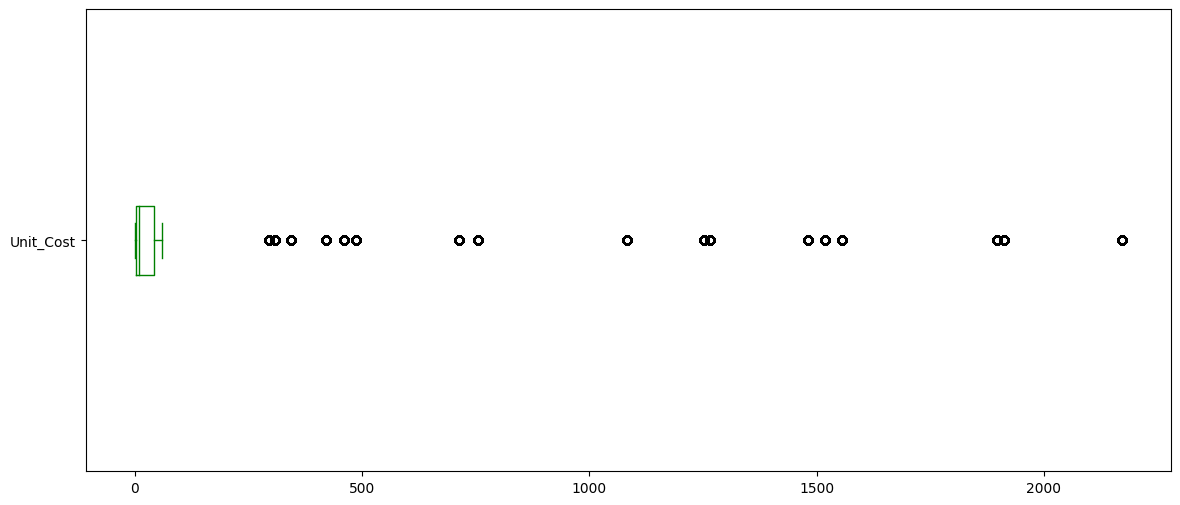

In [30]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6),color='green')

<Axes: ylabel='Density'>

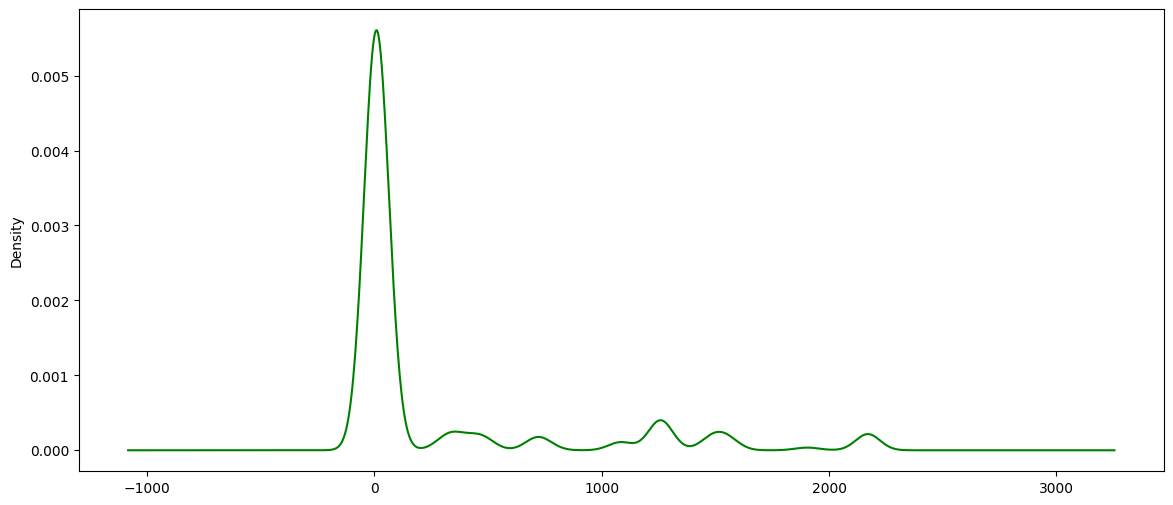

In [31]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6),color='green') # kde

<Axes: ylabel='Density'>

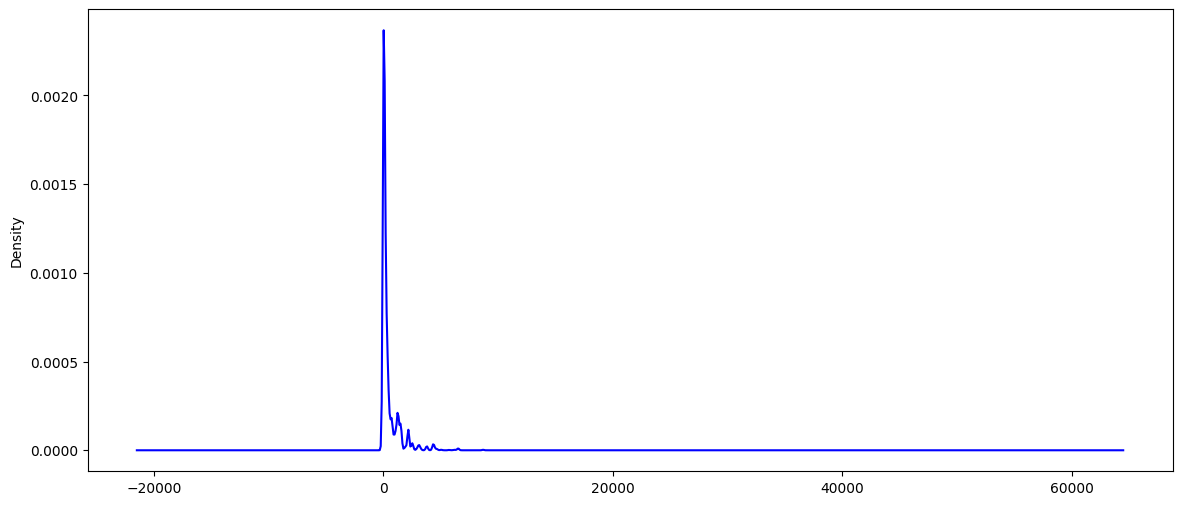

In [35]:
sales['Cost'].plot(kind='density', figsize=(14,6),color='blue') #kde

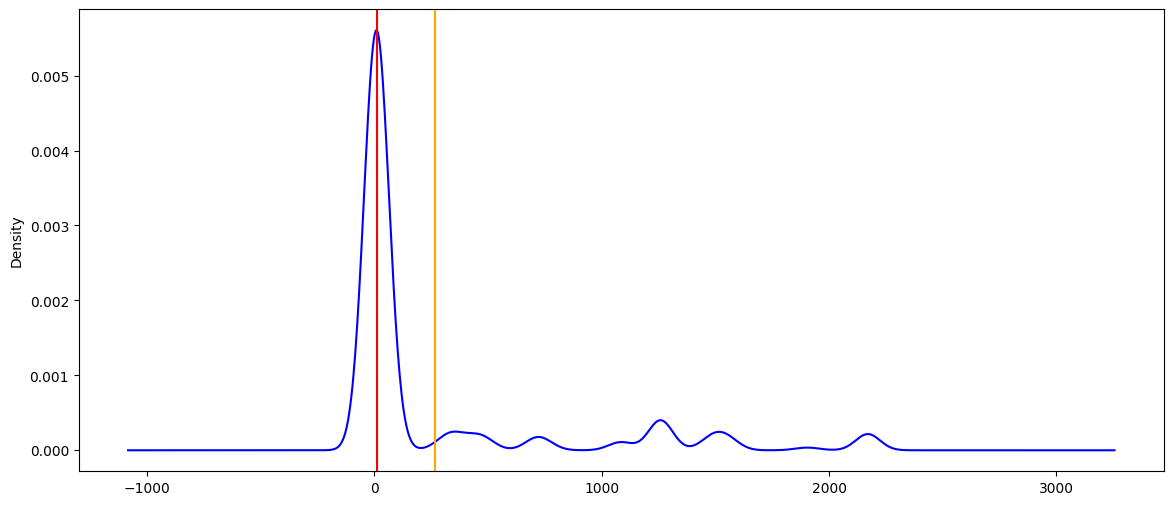

In [36]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6),color='blue') # kde
ax.axvline(sales['Unit_Cost'].mean(), color='orange')
ax.axvline(sales['Unit_Cost'].median(), color='red')

Text(0.5, 0, 'dollars')

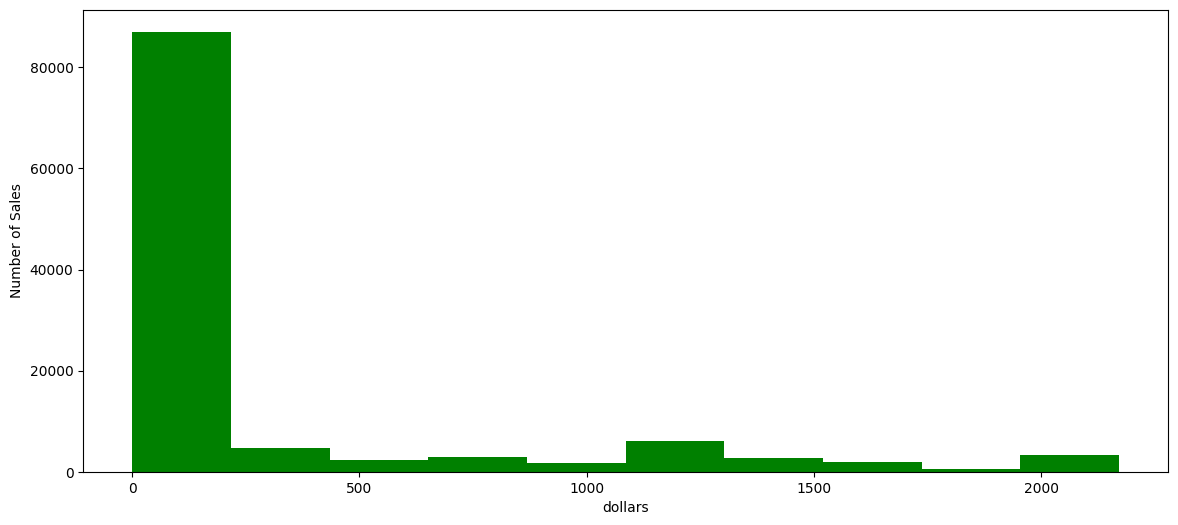

In [33]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6),color='green')
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

Text(0.5, 0, 'Revenue')

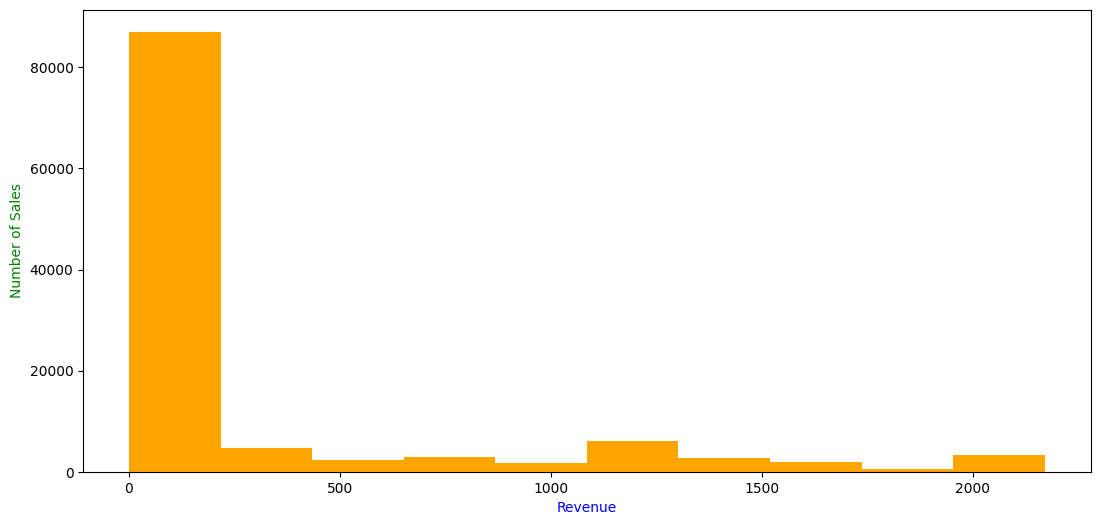

In [37]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(13,6),color='orange')
ax.set_ylabel('Number of Sales',color='green')
ax.set_xlabel('Revenue',color='blue')

**Categorical Analysis and Visualizations**

## Analysizing Age_Group Admin

In [38]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [39]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

Plot Age_Group data on piechat

<Axes: ylabel='Age_Group'>

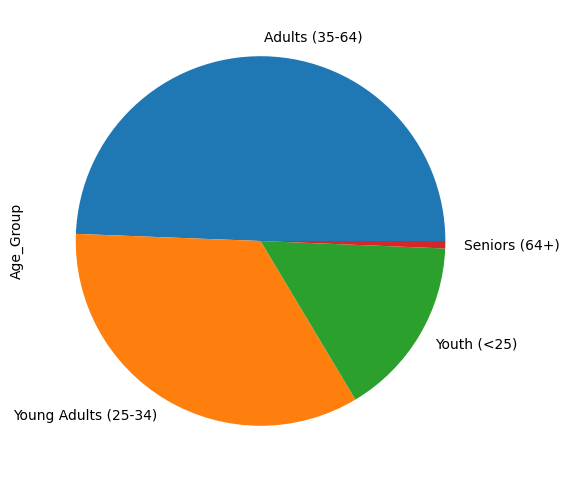

In [41]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(13,6))

Text(0.5, 24.0, 'Number of Sales')

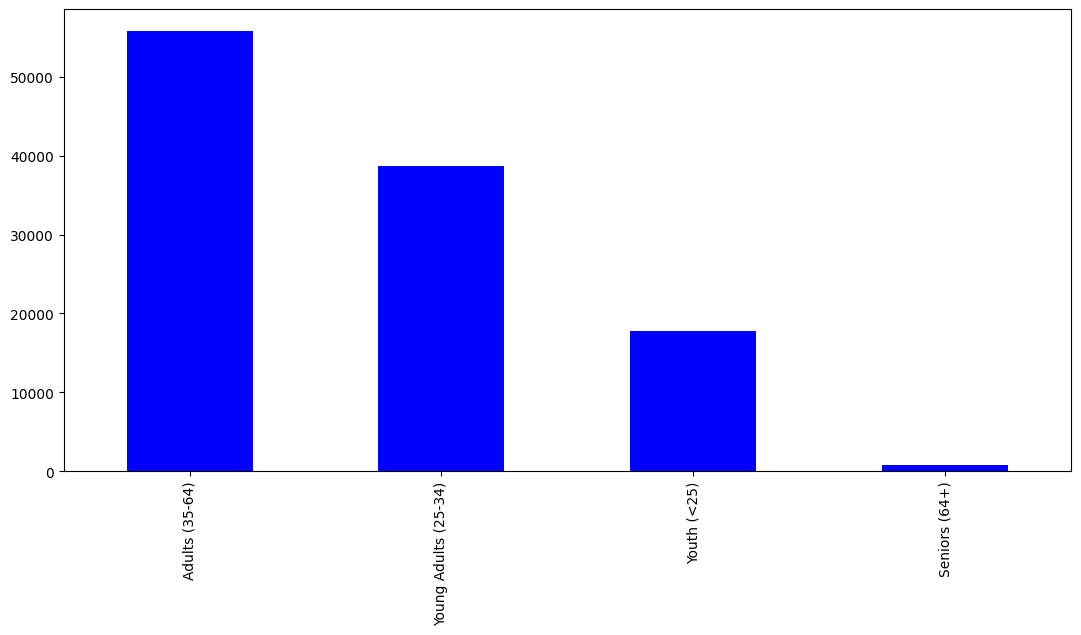

In [43]:
sales['Age_Group'].value_counts().plot(kind='bar', figsize=(13,6),color='blue')
ax.set_xlabel ('Number of Sales')

**Relationship Between Column**

**a  significant relationship**

In [45]:
corr = sales.corr()
corr

<ipython-input-45-9ba3b0e08523>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr()


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


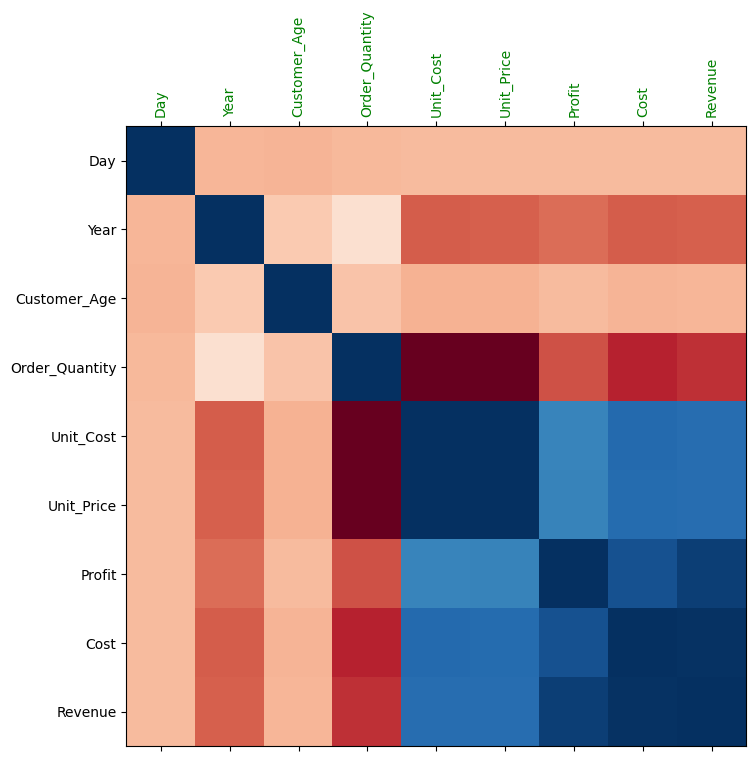

In [49]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical',color='green');
plt.yticks(range(len(corr.columns)), corr.columns,color='black');

<Axes: xlabel='Customer_Age', ylabel='Revenue'>

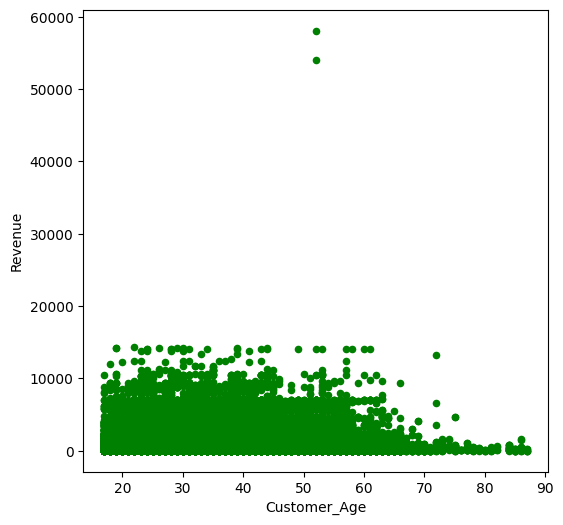

In [50]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6),color='green')

<Axes: xlabel='Profit', ylabel='Revenue'>

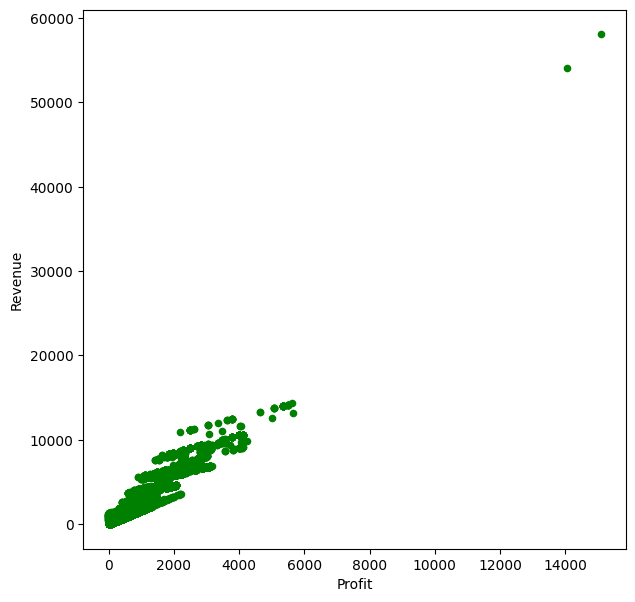

In [51]:
sales.plot(kind='scatter', x='Profit', y='Revenue', figsize=(7,7),color='green')

Text(0, 0.5, 'Profit')

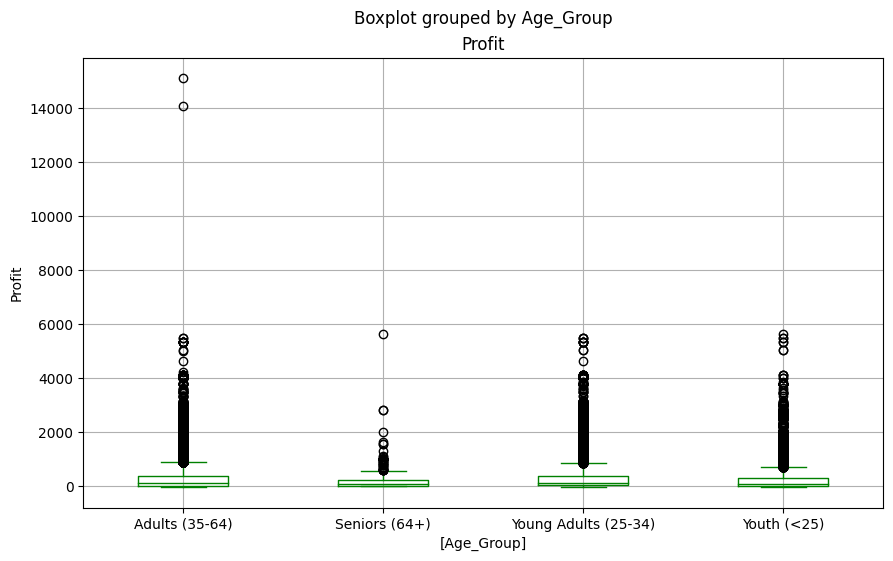

In [53]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6),color='green')
ax.set_ylabel('Profit')

Year                 Axes(0.125,0.53;0.227941x0.35)
Customer_Age      Axes(0.398529,0.53;0.227941x0.35)
Order_Quantity    Axes(0.672059,0.53;0.227941x0.35)
Unit_Cost            Axes(0.125,0.11;0.227941x0.35)
Unit_Price        Axes(0.398529,0.11;0.227941x0.35)
Profit            Axes(0.672059,0.11;0.227941x0.35)
dtype: object

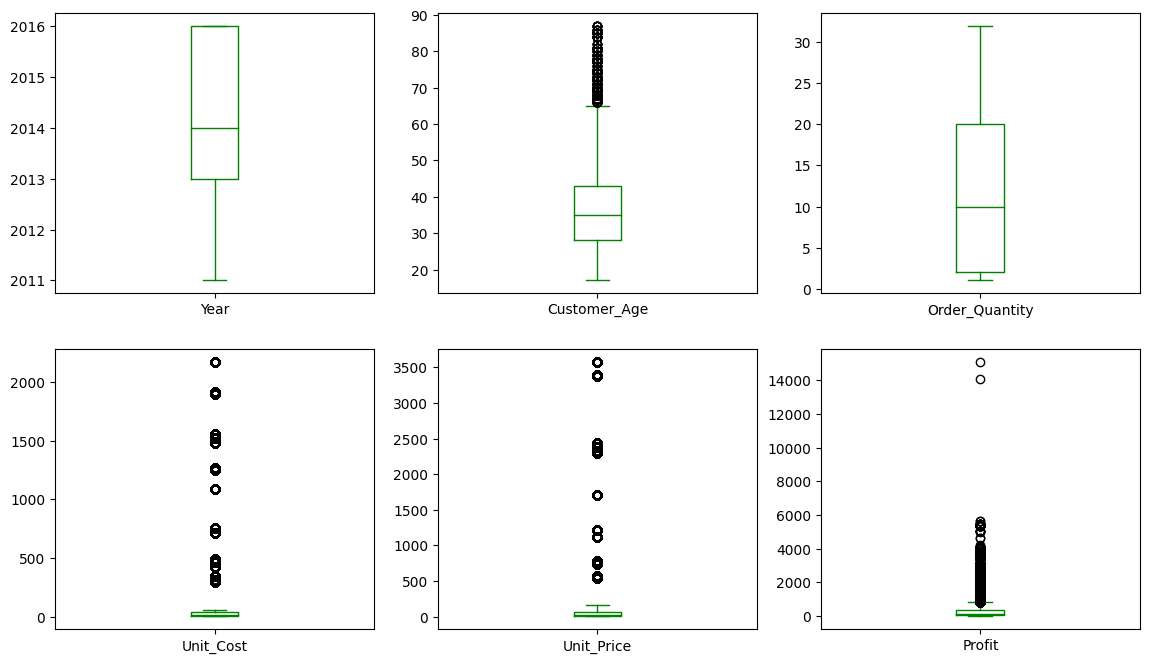

In [55]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8),color='green')

**Column wrangling**

**Addding new column of Revenue per Cutomer Age**

In [56]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<Axes: ylabel='Density'>

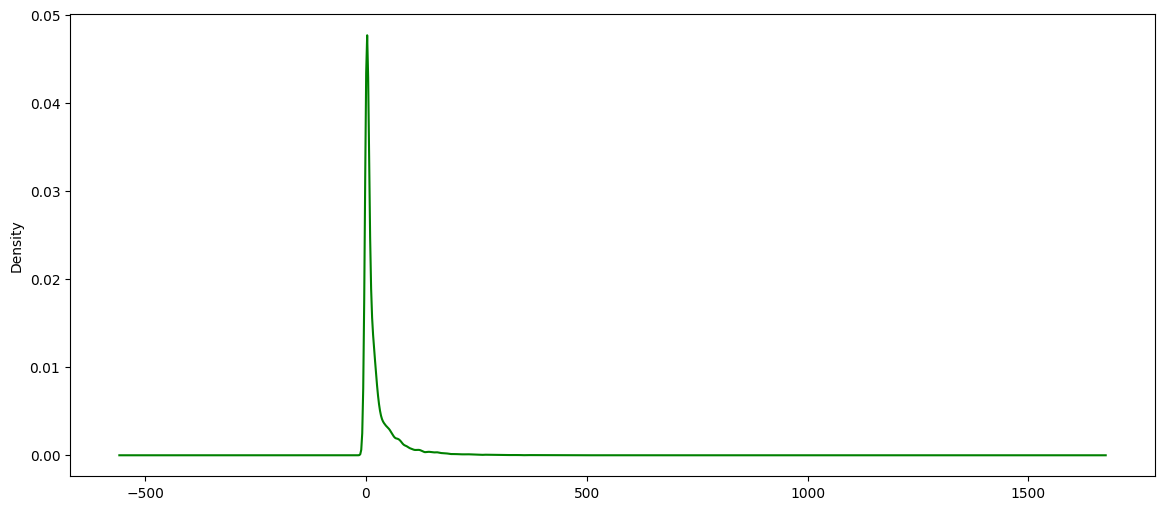

In [57]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6), color='green')

<Axes: ylabel='Frequency'>

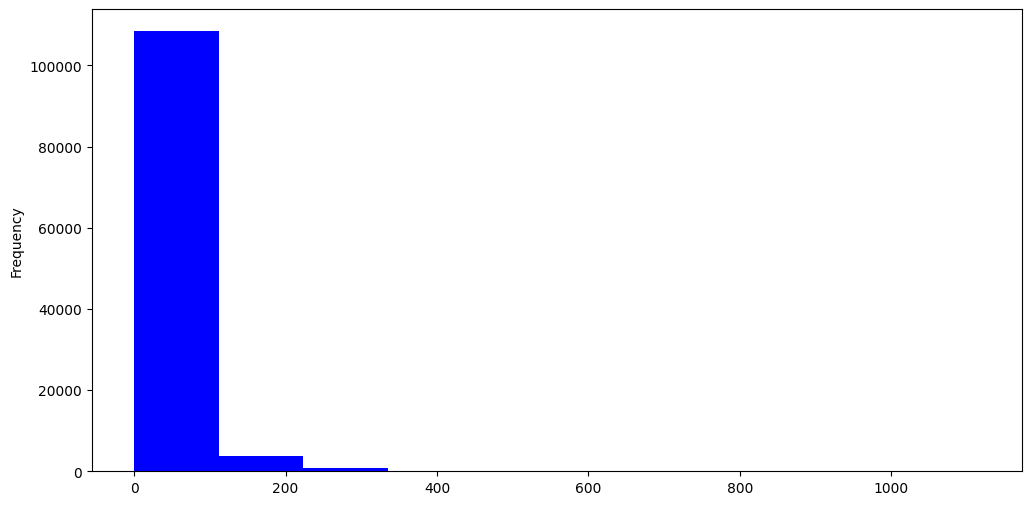

In [58]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(12,6), color='blue')

**Add and calculate a new Calculated_Cost column**

In [59]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [64]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

**Relationship between Cost and Profit using a scatter plot:**

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

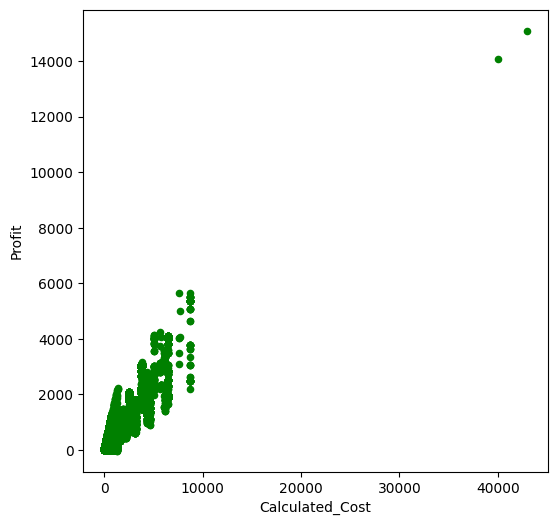

In [65]:
sales.plot(kind='scatter',x='Calculated_Cost', y='Profit', figsize=(6,6),color='green')

**Add and calculate a new Calculated_Revenue column**

Formula to find Calculated_Revenue is **Cost + Profit** for column sales data

In [66]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']
sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

**Sum if Calculated_Revenue is not equal to Revenue sales **

In [71]:
(sales['Calculated_Revenue'] != sales['Revenue'])

0         False
1         False
2         False
3         False
4         False
          ...  
113031    False
113032    False
113033    False
113034    False
113035    False
Length: 113036, dtype: bool

In [72]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

Sum if Calculated_Revenue is less than  equal to Revenue sales *

In [68]:
(sales['Calculated_Revenue']<= sales['Revenue'])

0         True
1         True
2         True
3         True
4         True
          ... 
113031    True
113032    True
113033    True
113034    True
113035    True
Length: 113036, dtype: bool

In [70]:
(sales['Calculated_Revenue']<= sales['Revenue']).sum()

113036

In [73]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


<Axes: ylabel='Frequency'>

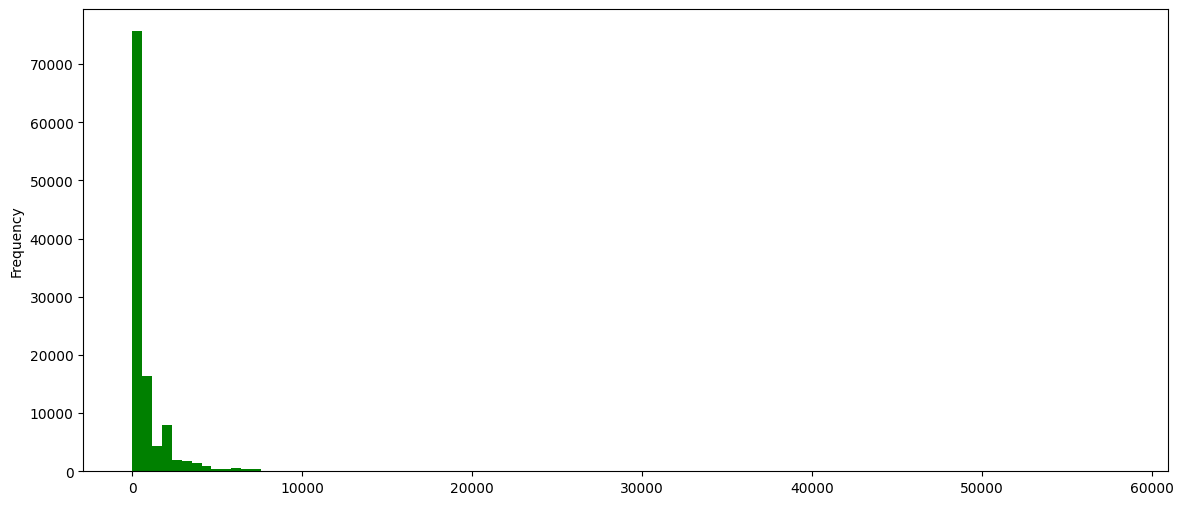

In [74]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6),color='green')

Modify all **Unit_Price values adding 3% tax** to them

In [75]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [76]:
#sales['Unit_Price'] = sales['Unit_Price'] * 1.03
sales['Unit_Price'] *= 1.03

In [78]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

# **Selection & Indexing:**
Get all the sales made in the **state of Kentucky**

In [79]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


In [80]:
sales.loc[sales['State']=='New South Wales']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,123.60,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,123.60,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,123.60,238,180,418,8.893617,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,5,45,123.60,297,225,522,11.106383,225,522
120,2014-01-02,2,January,2014,34,Young Adults (25-34),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,5,45,123.60,297,225,522,15.352941,225,522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112985,2016-05-05,5,May,2016,25,Young Adults (25-34),M,Australia,New South Wales,Clothing,...,"Classic Vest, L",14,24,65.92,444,336,780,31.200000,336,780
112996,2014-03-25,25,March,2014,58,Adults (35-64),F,Australia,New South Wales,Clothing,...,"Classic Vest, L",9,24,65.92,285,216,501,8.637931,216,501
112997,2016-03-25,25,March,2016,58,Adults (35-64),F,Australia,New South Wales,Clothing,...,"Classic Vest, L",10,24,65.92,317,240,557,9.603448,240,557
112998,2014-04-06,6,April,2014,58,Adults (35-64),F,Australia,New South Wales,Clothing,...,"Classic Vest, L",25,24,65.92,792,600,1392,24.000000,600,1392


**Get the mean revenue of the Adults (35-64) sales group**

In [81]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

**How many records belong to Age Group Youth (<25) or Adults (35-64)?**

In [82]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

**Get the mean revenue of the sales group Adults (35-64) in United States**

In [83]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

**Increase the revenue by 10% to every sale made in France**

In [84]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [85]:
#sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1

sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [86]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

**Converty Notebook  to HTML and then print out PDF**

In [99]:
!jupyter nbconvert --to html /content/Bike_Sales_Store_Full_Completed_Python_Project.ipynb

[NbConvertApp] Converting notebook /content/Bike_Sales_Store_Full_Completed_Python_Project.ipynb to html
[NbConvertApp] Writing 1248740 bytes to /content/Bike_Sales_Store_Full_Completed_Python_Project.html


**Methods 2 : Converting HTML to a PDF File**

In [100]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [101]:
!jupyter nbconvert --to pdf /content/Bike_Sales_Store_Full_Completed_Python_Project.ipynb

[NbConvertApp] Converting notebook /content/Bike_Sales_Store_Full_Completed_Python_Project.ipynb to pdf
[NbConvertApp] Support files will be in Bike_Sales_Store_Full_Completed_Python_Project_files/
[NbConvertApp] Making directory ./Bike_Sales_Store_Full_Completed_Python_Project_files
[NbConvertApp] Making directory ./Bike_Sales_Store_Full_Completed_Python_Project_files
[NbConvertApp] Making directory ./Bike_Sales_Store_Full_Completed_Python_Project_files
[NbConvertApp] Making directory ./Bike_Sales_Store_Full_Completed_Python_Project_files
[NbConvertApp] Making directory ./Bike_Sales_Store_Full_Completed_Python_Project_files
[NbConvertApp] Making directory ./Bike_Sales_Store_Full_Completed_Python_Project_files
[NbConvertApp] Making directory ./Bike_Sales_Store_Full_Completed_Python_Project_files
[NbConvertApp] Making directory ./Bike_Sales_Store_Full_Completed_Python_Project_files
[NbConvertApp] Making directory ./Bike_Sales_Store_Full_Completed_Python_Project_files
[NbConvertApp] Maki